# Error bars in statistics
It is common to display error bars in data summary.  They may however represent distinct quantities.  Here we consider standard deviations, standard errors, and confidence intervals.


# Summary

- The **standard deviation** of a sample measures the variability within the sample.  
- The **standard error** of the mean measures the variability of sample means.  
- A **confidence interval** has a specified probability of containing the actual mean. 


# References:  

- [Lies and stats](https://liesandstats.wordpress.com/about/) by Luk Arbuckle
- [I'll bet you don't understand error bars](https://scienceblogs.com/cognitivedaily/2007/03/29/ill-bet-you-dont-understand-er) (Dave Munger)
- [On the use of error bars](https://skeetersays.wordpress.com/2008/07/30/on-the-use-of-error-bars/) (skeetersays)
- [Confidence intervals](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Confidence_Intervals/BS704_Confidence_Intervals_print.html) (Boston University School of Public Health)
- [Confidence intervals for machine learning](https://machinelearningmastery.com/confidence-intervals-for-machine-learning/) (machinelearningmastery)
- [Compute a confidence interval from sample data](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data) (stackoverflow)

# Imports

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Populations in statistics
A population consists of a usually finite number of entities.  It is typically sufficiently large so that, for all practical purposes, we are willing to assume that it takes on a continuum of values, in which case we could speak of a continuous population.  Otherwise, the population is discrete which generally means that it takes on a finite number of values.

# Distribution of a population
In case of a discrete population, the **distribution function** of the population is the number of elements in the population taking on all possible values.  In case of a continuous population, it is more appropriate to consider its **distribution density function** which allows to calculate the proportion of the population  falling in any range of values.

# Samples of a population
A **sample** is a subset taken from the population.  For clarity, we empasize that a sample consists a several elements, say $n$, selected from the population.  It is assumed that the elements have been selected randomly and independently.  Thus, each element is outcome of a random variable whose distribution function (or distribution density function) is given by the population distribution function (or distribution density function).  Denote with $X$ this random variable.

Therefore, a sample is the outcome of a (multi-dimensional) random variable, denoted $(X_1, \dots, X_n)$ where $n$ is the size of the sample and $X_1, \dots, X_n$ are independent random variables with distribution law equal to that of $X$.  

# Boxplots
A boxplot gives a summary of each sample: the median, the lower and upper quartiles, and "minimum" and "maximum" values (after removal of outliers, depicted with circles):

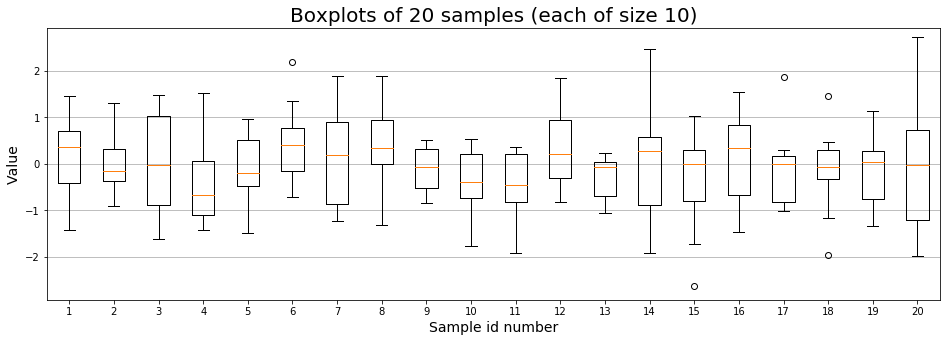

In [2]:
np.random.seed(42)

# Parameters
nb_samples = 20
sample_size = 10

# Samples
samples = scipy.stats.norm.rvs(size=(sample_size, nb_samples))

# Visualization
fig, ax = plt.subplots(figsize=(16, 5))

ax.boxplot(samples);
ax.set_title(f"Boxplots of {nb_samples} samples (each of size {sample_size})", fontsize=20)

ax.set_xlabel("Sample id number", fontsize=14)
ax.set_ylabel("Value", fontsize=14)

ymax = samples.max() + .2
ax.set_ylim(-ymax, ymax)

ax.grid(axis='y')

# Mean and standard deviation of samples
Alternative to the boxplot, we can plot the mean and standard deviation of the samples:

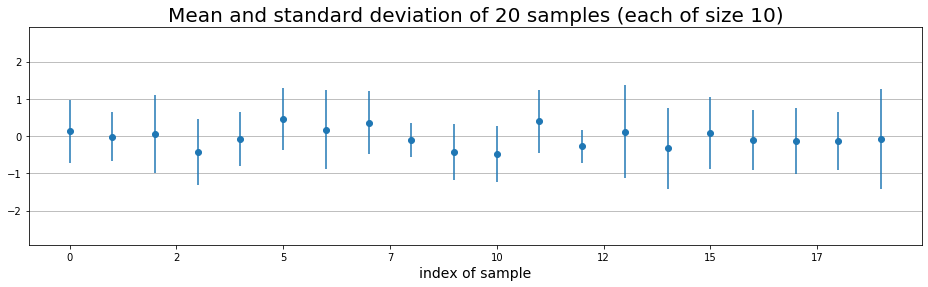

In [3]:
np.random.seed(42)

# Parameters
nb_samples = 20
sample_size = 10

# Samples
samples = scipy.stats.norm.rvs(size=(sample_size, nb_samples))

# Statistics
means = samples.mean(axis=0)
stds = samples.std(axis=0)

# Visualization
fig, ax = plt.subplots(figsize=(16, 4))

ax.errorbar(range(nb_samples), means, stds, fmt='o')
ax.set_title(f"Mean and standard deviation of {nb_samples} samples (each of size {sample_size})", fontsize=20)

ax.set_xticklabels([int(x) for x in ax.get_xticks()])
ax.set_xlabel("index of sample", fontsize=14)

ymax = samples.max() + .2
ax.set_ylim(-ymax, ymax)

ax.grid(axis='y')

# Estimating the mean: sample mean

A typical question is to estimate the mean value of the population (provided it is numerical).  The simplest estimate is to take the mean of *a* particular sample as this estimate, and it is called the **sample mean**.  Formally, the sample mean is an outcome of the random variable $Z := \frac1n \sum_{i=1}^nX_n$. 

> How good is the sample mean for an estimate?  

It is a standard exercise in probability theory to show that  $\mu_Z= \mu$ if $\mu_{X_i} = \mu$ for each $i$.  This makes the sample mean an **unbiased estimator**.  Nevertheless, sample means being distinct outcomes of a random variable, they will exhibit variability.  

> What is the variability of the sample mean?

# The standard error
The standard deviation of the sample mean can be calculated as $\sigma_Z = \sigma/\sqrt{n}$ where $\sigma$ is the standard deviation of $X$ and $n$ is the sample size.  The standard deviation of the sample mean is also called the **standard error (of the mean)**.  Note that it is independent of the sample (i.e. the outcome), and is a statistic on the random variable from which the sample mean is derived.  

> The standard error gives an indication of the precision of the sample mean as an estimator since it measures its variability.  

If $\mu$ is unknown (we are trying to estimate it), it is likely that $\sigma$ is unknown as well.  Thus, we can only estimate $\sigma$ with the **sample standard deviation**, which is the standard deviation of the sample.  

**Warning.**  There are distinct estimators for the sample standard deviation.  If the sample size is large, the most conventional estimators will be nearly identical.  

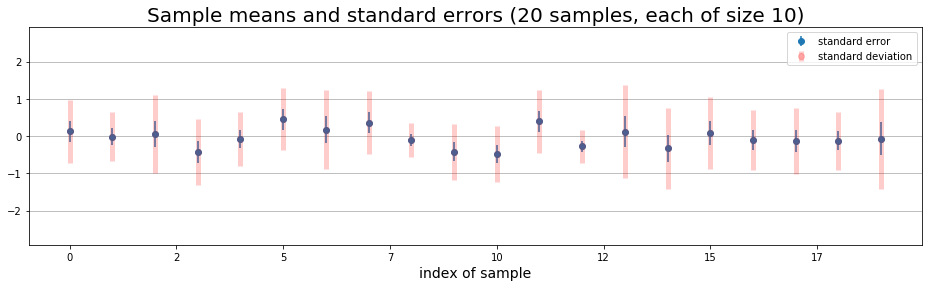

In [4]:
np.random.seed(42)

# Parameters
nb_samples = 20
sample_size = 10

# Samples
samples = scipy.stats.norm.rvs(size=(sample_size, nb_samples))

# Statistics
means = samples.mean(axis=0)
sems = scipy.stats.sem(samples, axis=0)

# Visualization
fig, ax = plt.subplots(figsize=(16, 4))

ax.errorbar(range(nb_samples), means, sems, fmt='o', label='standard error')
ax.errorbar(range(nb_samples), means, stds, fmt='or', linewidth=5, alpha=.2, label='standard deviation')

ax.set_title(f"Sample means and standard errors ({nb_samples} samples, each of size {sample_size})", fontsize=20)

ax.set_xticklabels([int(x) for x in ax.get_xticks()])
ax.set_xlabel("index of sample", fontsize=14)
ax.legend()

ymax = samples.max() + .2
ax.set_ylim(-ymax, ymax)

ax.grid(axis='y')

# Confidence intervals

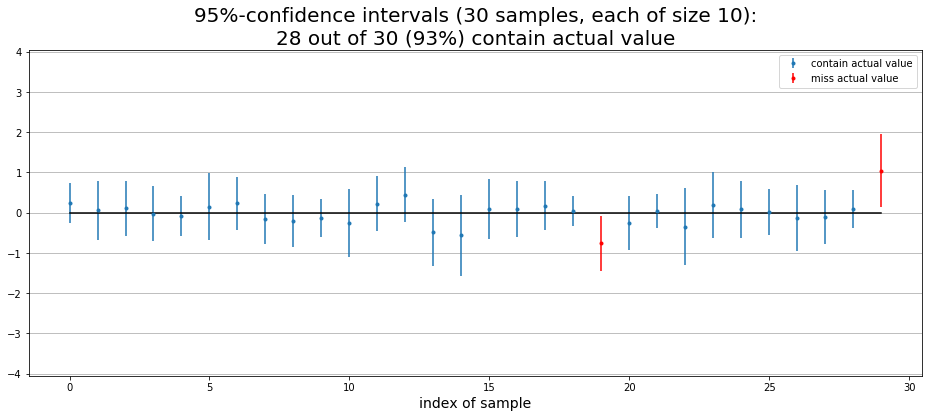

In [5]:
np.random.seed(42)

# Parameters
nb_samples = 30
sample_size = 10

# Samples
samples = scipy.stats.norm.rvs(size=(sample_size, nb_samples))

# Confidence level
alpha = .95

# Sample statistics
means = samples.mean(axis=0)
sems = scipy.stats.sem(samples, axis=0)
w = sems * scipy.stats.t.ppf((1 + alpha) / 2, sample_size - 1)

bad_idxs = (means - w >0) | (means + w <0)
good_idxs = (means - w <0) & (means + w > 0)

success = sum(good_idxs)/nb_samples

# Visualization
fig, ax = plt.subplots(figsize=(16, 6))

# ax.errorbar(range(nb_samples), means, w, fmt='o')
ax.errorbar(np.arange(nb_samples)[good_idxs], means[good_idxs], w[good_idxs], fmt='.', label='contain actual value')
ax.errorbar(np.arange(nb_samples)[bad_idxs], means[bad_idxs], w[bad_idxs], fmt='.r', label='miss actual value')
ax.plot([0, nb_samples - 1], [0, 0], 'k')

ax.set_title(f"{alpha:.0%}-confidence intervals ({nb_samples} samples, each of size {sample_size}):\n{sum(good_idxs)} out of {nb_samples} ({success:.0%}) contain actual value", fontsize=20)

ax.set_xticklabels([int(x) for x in ax.get_xticks()])
ax.set_xlabel("index of sample", fontsize=14)

ymax = max(-samples.min(), samples.max()) + .2
ax.set_ylim(-ymax, ymax)

ax.legend()
ax.grid(axis='y')